In [4]:
import pandas as pd

# Specify the file path using raw string (prepend with r)
df = pd.read_csv(r'C:\Users\User\Downloads\insurance_dataset.csv')

# View data frame head
print(df.head())


   age  gender    bmi  children smoker     region medical_history  \
0   46    male  21.45         5    yes  southeast        Diabetes   
1   25  female  25.38         2    yes  northwest        Diabetes   
2   38    male  44.88         2    yes  southwest             NaN   
3   25    male  19.89         0     no  northwest             NaN   
4   49    male  38.21         3    yes  northwest        Diabetes   

  family_medical_history exercise_frequency    occupation coverage_level  \
0                    NaN              Never   Blue collar        Premium   
1    High blood pressure       Occasionally  White collar        Premium   
2    High blood pressure       Occasionally   Blue collar        Premium   
3               Diabetes             Rarely  White collar       Standard   
4    High blood pressure             Rarely  White collar       Standard   

        charges  
0  20460.307669  
1  20390.899218  
2  20204.476302  
3  11789.029843  
4  19268.309838  


In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Remove null values
df.dropna(inplace=True)

print(df.columns)

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')


In [6]:
# Convert all columns to strings
df = df.astype(str)

# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# Assuming the last column is the target variable and all other columns are features
# Encoding target variable if it's categorical
if df.iloc[:, -1].dtype == 'object':
    label_encoder = LabelEncoder()
    df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

# Encoding categorical features if any
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])

# View the head of the dataframe after encoding
print("\nHead of the dataframe after removing null values and label encoding:")
print(df.head())


Head of the dataframe after removing null values and label encoding:
    age  gender   bmi  children  smoker  region  medical_history  \
1     7       0   738         2       1       1                0   
4    31       1  2021         3       1       1                0   
6    46       0   212         2       0       0                2   
7    35       1  1251         4       0       2                1   
11   27       0  2168         1       0       1                2   

    family_medical_history  exercise_frequency  occupation  coverage_level  \
1                        2                   2           3               1   
4                        2                   3           3               2   
6                        2                   1           0               0   
7                        2                   3           1               2   
11                       2                   2           0               1   

    charges  
1    380257  
4    327531  
6    55733

In [7]:
# Print column names
print(df.columns)

# Inspect the DataFrame to see if the column 'charges' exists
print(df.head())


Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')
    age  gender   bmi  children  smoker  region  medical_history  \
1     7       0   738         2       1       1                0   
4    31       1  2021         3       1       1                0   
6    46       0   212         2       0       0                2   
7    35       1  1251         4       0       2                1   
11   27       0  2168         1       0       1                2   

    family_medical_history  exercise_frequency  occupation  coverage_level  \
1                        2                   2           3               1   
4                        2                   3           3               2   
6                        2                   1           0               0   
7                        2                   3           1           

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have your data stored in a pandas DataFrame 'df'

# Separate features (X) and target variable (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (449337, 11) (449337,)
Testing set shape: (112335, 11) (112335,)


In [9]:
import numpy as np
from scipy.special import expit
class MLP:
    def __init__(self, n_inputs, n_hidden, n_outputs, eta=0.1, n_iter=100):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.eta = eta
        self.n_iter = n_iter

        # Initialize weights
        self.weights_input_hidden = np.random.uniform(-0.5, 0.5, size=(self.n_hidden, self.n_inputs + 1))
        self.weights_hidden_output = np.random.uniform(-0.5, 0.5, size=(self.n_outputs, self.n_hidden + 1))

    def sigmoid(self, x):
        return expit(x) #return 1 / (1 + np.exp(-x)) #

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        X = np.column_stack((X, np.ones(len(X))))  # Add bias term

        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                # Forward pass
                hidden_input = np.dot(self.weights_input_hidden, xi)
                hidden_output = self.sigmoid(hidden_input)

                hidden_output = np.append(hidden_output, 1)  # Add bias term
                output_input = np.dot(self.weights_hidden_output, hidden_output)
                output_output = self.sigmoid(output_input)

               # Backpropagation
                output_error = target - output_output
                output_delta = output_error * self.sigmoid_derivative(output_output)

# Backpropagation
                output_error = target - output_output
                output_delta = output_error * self.sigmoid_derivative(output_output)

# Remove bias term from hidden_error
                hidden_error = np.dot(self.weights_hidden_output.T, output_delta)[:-1]

# Reshape hidden_error to match the shape of hidden_output
                hidden_error = hidden_error.reshape(-1, 1)

                hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

    def predict(self, X):
        X = np.column_stack((X, np.ones(len(X))))  # Add bias term
        predictions = []

        for xi in X:
            hidden_input = np.dot(self.weights_input_hidden, xi)
            hidden_output = self.sigmoid(hidden_input)

            hidden_output = np.append(hidden_output, 1)  # Add bias term
            output_input = np.dot(self.weights_hidden_output, hidden_output)
            output_output = self.sigmoid(output_input)

            predictions.append(output_output)

        return np.array(predictions)

"""# Usage example:
mlp = MLP(n_inputs=X_train.shape[1], n_hidden=10, n_outputs=1, eta=0.1, n_iter=10)
mlp.fit(X_train, y_train)
"""

'# Usage example:\nmlp = MLP(n_inputs=X_train.shape[1], n_hidden=10, n_outputs=1, eta=0.1, n_iter=10)\nmlp.fit(X_train, y_train)\n'

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
"""
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
"""
# XGBoost
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# MLP model
mlp = MLP(n_inputs=X_train.shape[1], n_hidden=10, n_outputs=1, eta=0.1, n_iter=10)
mlp.fit(X_train, y_train)

# Neural Network model
# Train the model
history = neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
neural_network.evaluate(X_test, y_test)

# Predictions
linear_preds = linear_model.predict(X_test)
poly_preds = poly_model.predict(X_poly_test)
#rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
mlp_preds = mlp.predict(X_test)
neural_network_preds = neural_network.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation function for regression
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluate Linear Regression
linear_mae, linear_mse, linear_rmse, linear_r2 = evaluate_regression(y_test, linear_preds)

# Evaluate Polynomial Regression
poly_mae, poly_mse, poly_rmse, poly_r2 = evaluate_regression(y_test, poly_preds)

# Evaluate XGBoost
xgb_mae, xgb_mse, xgb_rmse, xgb_r2 = evaluate_regression(y_test, xgb_preds)

# Evaluate MLP
mlp_mae, mlp_mse, mlp_rmse, mlp_r2 = evaluate_regression(y_test, mlp_preds)

# Evaluate MLP
neural_network_mae, neural_network_mse, neural_network_rmse, neural_network_r2 = evaluate_regression(y_test, neural_network_preds)


# Display results
print("Linear Regression:")
print("MAE:", linear_mae)
print("MSE:", linear_mse)
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)
print("\n")

print("Polynomial Regression (degree 2):")
print("MAE:", poly_mae)
print("MSE:", poly_mse)
print("RMSE:", poly_rmse)
print("R-squared:", poly_r2)
print("\n")

print("XGBoost:")
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("R-squared:", xgb_r2)
print("\n")

print("MLP:")
print("MAE:", mlp_mae)
print("MSE:", mlp_mse)
print("RMSE:", mlp_rmse)
print("R-squared:", mlp_r2)

# Print the evaluation results
print("Neural Network:")
print("MAE:", neural_network_mae)
print("MSE:", neural_network_mse)
print("RMSE:", neural_network_rmse)
print("R-squared:", neural_network_r2)


Epoch 1/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 8282979328.0000 - val_loss: 8100189696.0000
Epoch 2/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 7595099648.0000 - val_loss: 7853446656.0000
Epoch 3/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 7058863616.0000 - val_loss: 6770276864.0000
Epoch 4/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 6705990144.0000 - val_loss: 6180794880.0000
Epoch 5/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 6613364736.0000 - val_loss: 6263192576.0000
Epoch 6/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 6441946112.0000 - val_loss: 6163237888.0000
Epoch 7/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 6270587904.0000 - val_loss: 6191315456.0000
Epoch 8/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 6244198400.0000 - val_loss: 6053382144.0000
Epoch 9/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 6073169408.0000 - val_loss: 5819482624.0000
Epoch 10/10
14042/1

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
def create_neural_network(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Initialize the neural network
neural_network = create_neural_network(input_shape=X_train.shape[1])

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
neural_network.evaluate(X_test, y_test)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 39956873216.0000 - val_loss: 24121460736.0000
Epoch 2/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 22518614016.0000 - val_loss: 18993678336.0000
Epoch 3/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 18849509376.0000 - val_loss: 18503593984.0000
Epoch 4/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 18543491072.0000 - val_loss: 18724812800.0000
Epoch 5/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 18387718144.0000 - val_loss: 18384220160.0000
Epoch 6/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 18367512576.0000 - val_loss: 19625852928.0000
Epoch 7/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 18218813440.0000 - val_loss: 18151475200.0000
Epoch 8/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 18158997504.0000 - val_loss: 17969256448.0000
Epoch 9/10
14042/14042 ━━━━━━━━━━━━━━━━━━━━ 1685s 120ms/step - loss: 18125594624.0000 - val_loss: 18417055744.00

17518125056.0

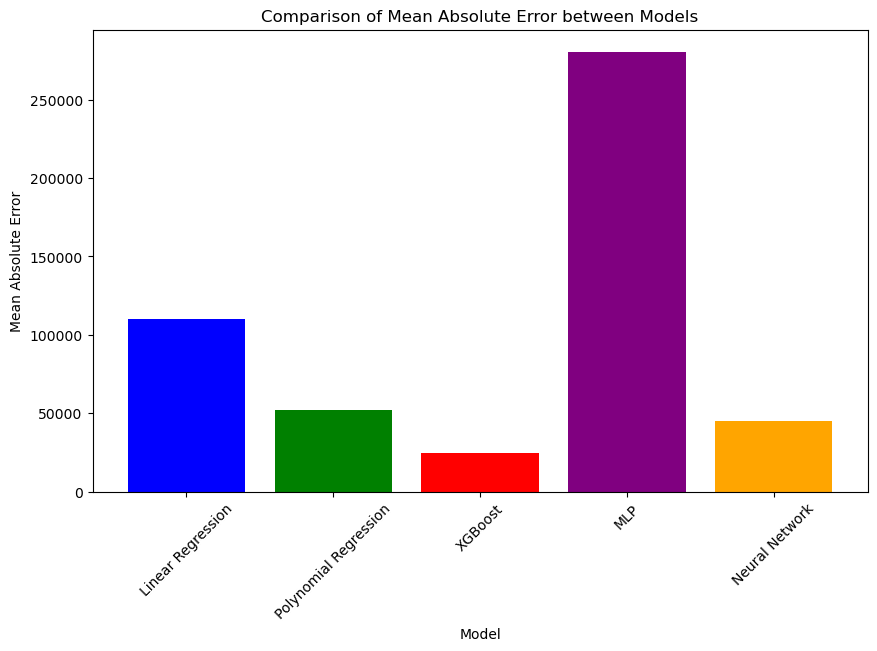

The best model is: XGBoost


In [27]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'XGBoost', 'MLP', 'Neural Network'],
    'Mean Absolute Error': [linear_mae, poly_mae, xgb_mae, mlp_mae, neural_network_mae]
})

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Mean Absolute Error'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error between Models')
plt.xticks(rotation=45)
plt.show()

# Print the best model
best_model = results.loc[results['Mean Absolute Error'].idxmin()]
print("The best model is:", best_model['Model'])

In [28]:
"""import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
def create_neural_network(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Initialize the neural network
neural_network = create_neural_network(input_shape=X_train.shape[1])

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
neural_network.evaluate(X_test, y_test)

# Make predictions
neural_network_preds = neural_network.predict(X_test)

# Evaluate the model
neural_network_mae = mean_absolute_error(y_test, neural_network_preds)
neural_network_mse = mean_squared_error(y_test, neural_network_preds)
neural_network_rmse = np.sqrt(neural_network_mse)
neural_network_r2 = r2_score(y_test, neural_network_preds)

# Print the evaluation results
print("Neural Network:")
print("MAE:", neural_network_mae)
print("MSE:", neural_network_mse)
print("RMSE:", neural_network_rmse)
print("R-squared:", neural_network_r2)
"""

'import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\n# Define the neural network architecture\ndef create_neural_network(input_shape):\n    model = Sequential([\n        Dense(64, activation=\'relu\', input_shape=(input_shape,)),\n        Dense(64, activation=\'relu\'),\n        Dense(1)  # Output layer with one neuron for regression\n    ])\n    return model\n\n# Initialize the neural network\nneural_network = create_neural_network(input_shape=X_train.shape[1])\n\n# Compile the model\nneural_network.compile(optimizer=\'adam\', loss=\'mean_squared_error\')\n\n# Train the model\nhistory = neural_network.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))\n\n# Evaluate the model\nneural_network.evaluate(X_test, y_test)\n\n# Make predictions\nneural_network_preds = neural_network.predict(X_test)\n\n# Evaluate the model\nneural_network_mae = mean_absolute_error(y_test, neural_network_preds)\nneu